# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [ ]:
# Импортируем все нужные библиотеки для работы с проектом
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.1f}'.format

In [ ]:
# Открываем полученные данные с возможностью открыть файл с сервера Яндекса в случае потери файла на локальном сервере
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://***/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# Знакомимся с самими данными наглядно
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0


In [ ]:
# Изучаем столбцы полученной таблицы и типы данных в них
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [ ]:
# Охарактеризовываем числовые данные
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.0",9.9,5.7,0.0,6.0,9.0,14.0,50.0
last_price,"23,699.0","6,541,548.8","10,887,013.3","12,190.0","3,400,000.0","4,650,000.0","6,800,000.0","763,000,000.0"
total_area,"23,699.0",60.3,35.7,12.0,40.0,52.0,69.9,900.0
rooms,"23,699.0",2.1,1.1,0.0,1.0,2.0,3.0,19.0
ceiling_height,"14,504.0",2.8,1.3,1.0,2.5,2.6,2.8,100.0
floors_total,"23,613.0",10.7,6.6,1.0,5.0,9.0,16.0,60.0
living_area,"21,796.0",34.5,22.0,2.0,18.6,30.0,42.3,409.7
floor,"23,699.0",5.9,4.9,1.0,2.0,4.0,8.0,33.0
kitchen_area,"21,421.0",10.6,5.9,1.3,7.0,9.1,12.0,112.0
balcony,"12,180.0",1.2,1.1,0.0,0.0,1.0,2.0,5.0


***Выводы по охарактеризованным данным***

* **last_price**: Особенно выделяются минимальная(12190р.) и максимальная(763000000р.) цены. Минимальная цена похоа на ошибку, скорее всего цену указывали в тысячах. Максимальная цена слишком разнится со средними ценами и может сильно влиять на результаты, возможно придётся избавиться от таких данных, чтобы иследования получились более качественными.

* **rooms**: Минимальное значение(0) бросается в глаза, стоит проверить на соотношение к столбцу **studio**.

* **ceiling_height**: Минимальные значения(1) и максимальные(100) опять же выделяются. По возможности их нужно исправить, иначе удалить.

* **floors_total**: Максимальное значение(60) слишком велико для этой местности, похоже на ошибку, от таких данных стоит избавиться.

* **living_area**: Минимальное значение(2) явная ошибка. Эти данные нужно удалить.

* **kitchen_area**: Минимальное значение(1.3) явная ошибка. Эти данные так же нужно удалить.

* **airports_nearest**: Минимальное значение(0) явная ошибка. Скорее всего аэропорта рядом просто нет.

* **days_exposition**: Минимальное(1) и максимальное(1580) значения вполне возможны для этого столбца вполне возможны, но могут сильно влиять на результаты исследований, возможно от них стоит избавиться.

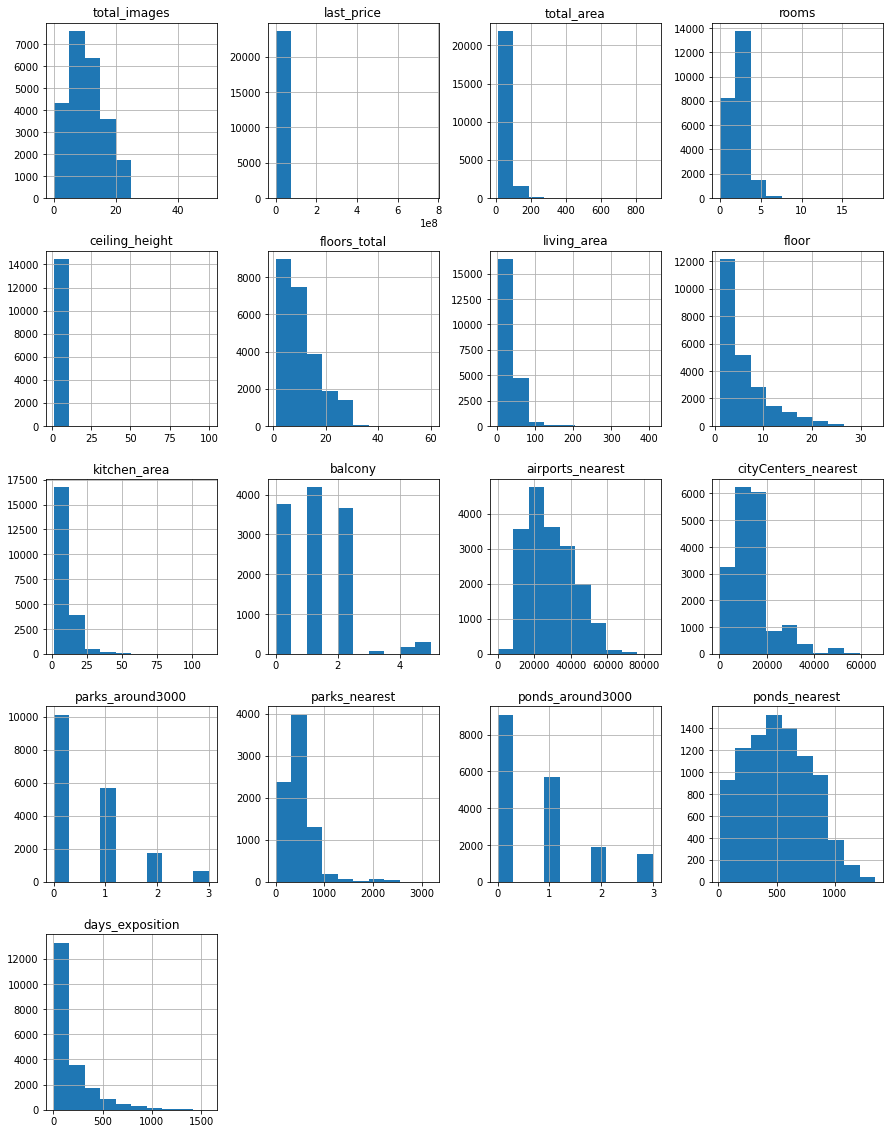

In [ ]:
# Строим гистограммы всех числовых столбцов таблицы
df.hist(figsize=(15, 20));

In [ ]:
# Оцениваем данные на наличие явных дубликатов
df.duplicated().sum()

0

#### Вывод:
* Прочитали и изучили файл с данными
* На основе изученных данных составили план по предобработке:
- [x] проверить и исправить пропуски, где это возможно;
- [x] переименовать некоторые стобцы, приведя их к "змеиному регистру";
- [x] согласно характеризации числовых данных некоторые значения нужно исправить;
- [x] в некоторых столбцах нужно изменить тип данных:
    - [x] last_price (float64 - int64)
    - [x] first_day_exposition (object - datetime)
    - [x] floors_total (float64 - int64)
    - [x] is_apartment (object - bool)
    - [x] balcony (float64 - int64)
- [x] проверить и исправить дубликаты.

### Выполните предобработку данных

####  Пропуски данных

In [ ]:
# Проверяем пропуски в каждом столбце
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- [x] **ceiling_height** - Пропусков очень много, чуть меньше половины всех данных. **Заменим пропуски на медианные значения после исправлений в данных**;
- [x] **floors_total** - Пропусков мало и отсутствие строк с ними не повлияют на результаты исследований. **Удалим пропуски**;
- [x] **living_area** - Пропуски составляют примерно 10% всех данных. Видимо, пользователи не заполнили эти данные. Эти данные важны для исследований, но их нечем заполнить. **Оставим пропуски**;
- [x] **is_apartment** - Пропусков очень много. Вероятно при продаже жилья этот пункт оставляют пустым. **Заменим пропуски на False**;
- [x] **kitchen_area** - Пропуски составляют примерно 10% всех данных. Видимо, пользователи не заполнили эти данные. Эти данные важны для исследований, но их нечем заполнить. **Оставим пропуски**;
- [x] **balcony** - Пропусков очень много. Вероятно при отсутствии балконов этот пункт оставляют пустым. **Заменим пропуски на 0**;
- [x] **locality_name** - Пропусков мало и отсутствие строк с ними не повлияют на результаты исследований. **Удалим пропуски**;
- [x] **airports_nearest** - Пропуски составляют примерно четверть всех данных, но для ислледований эти данные не важны. **Оставим пропуски**;
- [x] **city_centers_nearest** - Пропуски составляют примерно четверть всех данных, но для ислледований эти данные не важны. **Оставим пропуски**;
- [x] **parks_around_3000** - Пропуски составляют примерно четверть всех данных, но для ислледований эти данные не важны. **Оставим пропуски**;
- [x] **parks_nearest** - Пропусков очень много, но для ислледований эти данные не важны. **Оставим пропуски**;
- [x] **ponds_around_3000** - Пропуски составляют примерно четверть всех данных, но для ислледований эти данные не важны. **Оставим пропуски**;
- [x] **ponds_nearest** - Пропусков очень много, но для ислледований эти данные не важны. **Оставим пропуски**;
- [x] **days_exposition** - Пропуски составляют чуть больше 10% всех данных. Вероятно пропуски вызваны технической ошибкой во время сохранения/передачи данных. Эти данные важны для исследований, но их нечем заполнить. **Оставим пропуски**.

In [ ]:
# Удаляем строки с пропусками, т.к. они не повлияют на результаты исследований
df.dropna(subset = ['floors_total'], inplace=True)

In [ ]:
# Заменим пропуски на значение False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [ ]:
# Заменим пропуски на 0
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
# Удаляем строки с пропусками, т.к. они не повлияют на результаты исследований
df.dropna(subset = ['locality_name'], inplace=True)

In [ ]:
# Проверяем пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Переименовывание столбцов

In [ ]:
# Переименуем названия столбов, приведя их в 'змеиный регистр'
df = df.rename(
    columns={'cityCenters_nearest': 'city_centers_nearest',
             'parks_around3000': 'parks_around_3000',
             'ponds_around3000': 'ponds_around_3000'}
)

In [ ]:
# Проверим названия столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### Исправление данных

In [ ]:
# врядли высота потолков может быть больше 5 метров
# исправим ошибку, разделив высоту на 10 там, где высота потолка выше 20
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10

In [ ]:
# Удалим строки с высотой потолков ниже 2.5 метров и выше 5 метров
# df = df.query('2.5 < ceiling_height < 5')

In [ ]:
# Заменим пропуски медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [ ]:
# Удалим строки, где общее количество этажей больше 35
df = df.query('floors_total < 35')

In [ ]:
# Удалим строки, где жилая площадь меньше 2 метров
# df = df.query('living_area > 2')

In [ ]:
# Удалим строки, где площадь кухни меньше 1.5 метров
# df = df.query('kitchen_area > 1.5')

#### Типы данных

In [ ]:
# Изменим тип данных на integer
df['last_price'].astype('int')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23535, dtype: int64

In [ ]:
# Изменим тип данных на datatime и проверим
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].head(20)

0    2019-03-07
1    2018-12-04
2    2015-08-20
3    2015-07-24
4    2018-06-19
5    2018-09-10
6    2017-11-02
7    2019-04-18
8    2018-05-23
9    2017-02-26
10   2017-11-16
11   2018-08-27
12   2016-06-30
13   2017-07-01
14   2016-06-23
15   2017-11-18
16   2017-11-23
17   2016-09-09
18   2017-01-27
19   2019-01-09
Name: first_day_exposition, dtype: datetime64[ns]

In [ ]:
# Изменим тип данных на integer
df['floors_total'].astype('int')

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23535, dtype: int64

In [ ]:
# Изменим тип данных на булев
df['is_apartment'].astype('bool')

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23535, dtype: bool

In [ ]:
# Изменим тип данных наа integer
df['balcony'].astype('int')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23535, dtype: int64

In [ ]:
# Проверим типы данных
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**Поменяли тип даннхы в столбцах:**
- **last_price** (float64 - int64) - цены продажи квартир будет корректным указывать в целых числах;
- **first_day_exposition** (object - datetime) - дату размещения объявления будет правильно использовать в формате даты, а не в текстовом формате;
- **floors_total** (float64 - int64) - количество этажей не может быть дробным;
- **is_apartment** (object - bool) - пункт "апартаменты" будет правильно использовать в булевом типе;
- **balcony** (float64 - int64) - количество балконов не может быть дробным.

#### Дубликаты

##### Явные дубликаты

In [ ]:
# Ещё раз проверим наличие явных дубликатов
df.duplicated().sum()

0

*Явных дубликатов не обнаружено*

##### Неявные дубликаты

In [ ]:
# Проверим уникальные названия населённых пунктов
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [ ]:
# Уберём типы населенных пунктов и оставим только названия
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё','е') # так же избавимся от дубликатов
    .replace(['деревня ', 'городского типа ', 'городской ','коттеджный ', 'пансионат ', 'платформа ', 'поселок ','при железнодорожной станции ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'село ', 'станции ', ], '', regex=True)
)

In [ ]:
# Проверим ещё раз
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

*Неявные дубликаты исправлены*

#### Вывод:
- Проверили и исправили пропуски:
    - **ceiling_height** - заменили пропуски на медианные значения;
    - **floors_total** - удалили пропуски;
    - **is_apartment** - Заменим пропуски на **False**;
    - **balcony** - Заменили пропуски на **0**;
    - **locality_name** - удалили пропуски.
- Переименовали стобцы, приведя их к "змеиному регистру":
    - **cityCenters_nearest** в **city_centers_nearest**;
    - **parks_around3000** в **parks_around_3000**;
    - **ponds_around3000** в **ponds_around_3000**.
- Исправили значения данных:
    - **ceiling_height** - исправили ошибку с высотой потолков выше 20 метров и избавились от выбросов;
    - **floors_total** - избавились от данных с количеством этажей больше 35;
    - **living_area** - избавились от данных, где жилая площадь меньше 2 метров;
    - **kitchen_area** - избавились от данных, где площадь кухни меньше 1.5 метров.
- Изменили тип данных:
    - **last_price** (float64 - int64);
    - **first_day_exposition** (object - datetime);
    - **floors_total** (float64 - int64);
    - **is_apartment** (object - bool);
    - **balcony** (float64 - int64).
- Проверили явные дубликаты и исправили неявные дубликаты в столбце **locality_name**.

### Добавьте в таблицу новые столбцы

**Новые столбцы для дальнейшего исследования:**

- **price_per_square_meter** - цена одного квадратного метра;
- **publication_weekday** - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- **publication_month** - месяц публикации объявления;
- **publication_year** - год публикации объявления;
- **floor_category** - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- **distance_city_center** - расстояние до центра города в километрах.

#### Столбец **price_per_square_meter**:

In [ ]:
# Добавим столбец с ценой за  один квадратный метр
df['price_per_square_meter'] = df['last_price'] / df['total_area']

In [ ]:
# Округлим значения до копеек
df['price_per_square_meter'] = df['price_per_square_meter'].round(2)

#### Столбец **publication_weekday**:

In [ ]:
# Добавим столбец с днём недели публикации объявления и заполним его функцией .dt.weekday
df['publication_weekday'] = df['first_day_exposition'].dt.weekday

#### Столбец **publication_month**:

In [ ]:
# Добавим столбец с месяцем публикации объявления и заполним его функцией .dt.month
df['publication_month'] = df['first_day_exposition'].dt.month

#### Столбец **publication_year**:

In [ ]:
# Добавим столбец с годом публикации объявления и заполним его функцией .dt.year
df['publication_year'] = df['first_day_exposition'].dt.year

#### Столбец **floor_category**:

In [ ]:
# Определим функцию, разделяющую объявления на категории по этажам
def floors_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [ ]:
# Добавим столбец с категориями по этажам и заполним его нашей функцией
df['floor_category'] = df.apply(floors_category, axis=1)

#### Столбец **distance_city_center**:

In [ ]:
# Добавим столбец с расстоянием до центра города в километрах, заполним
# значениями столбца city_centers_nearest, поделенными на 1000 и округлим до целых значений
df['distance_city_center'] = (df['city_centers_nearest'] / 1000).round()

**Проверяем добавленные стобцы:**

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,publication_weekday,publication_month,publication_year,floor_category,distance_city_center
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,"120,370.4",3,3,2019,другой,16.0
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,"82,920.8",1,12,2018,первый,19.0
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,"92,785.7",3,8,2015,другой,14.0
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,"408,176.1",4,7,2015,другой,7.0
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,"100,000.0",1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучение параметров объектов

##### Общая площадь

In [ ]:
# Охарактеризуем столбец total_area
df['total_area'].describe()

count   23,535.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.7
max        900.0
Name: total_area, dtype: float64

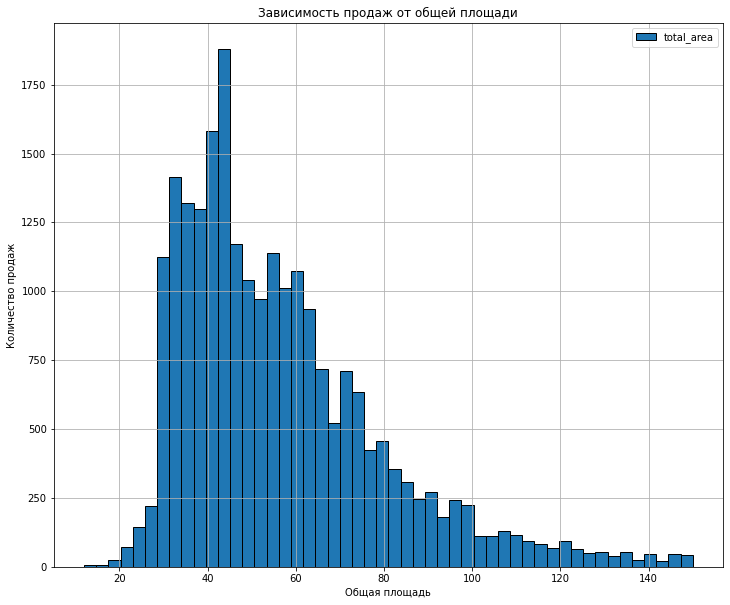

In [ ]:
# Оставим значения от  12 до 120 квадратных метров, отбросив выбросы и построим гистограмму
df['total_area'].hist( bins=50, range=(12, 150), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество продаж')
plt.show()

*Большинство проданных квартир имеют площадь от 30 до 70кв.м. Квартиры площадью менее 30кв.м. и более 100кв.м. встречаются редко. Среднее значение(60кв.м.) выше медианного(52в.м.), из-за этого график сильно растягивается.*

##### Жилая площадь

In [ ]:
# Охарактеризуем столбец living_area
df['living_area'].describe()

count   21,671.0
mean        34.5
std         22.1
min          2.0
25%         18.6
50%         30.0
75%         42.3
max        409.7
Name: living_area, dtype: float64

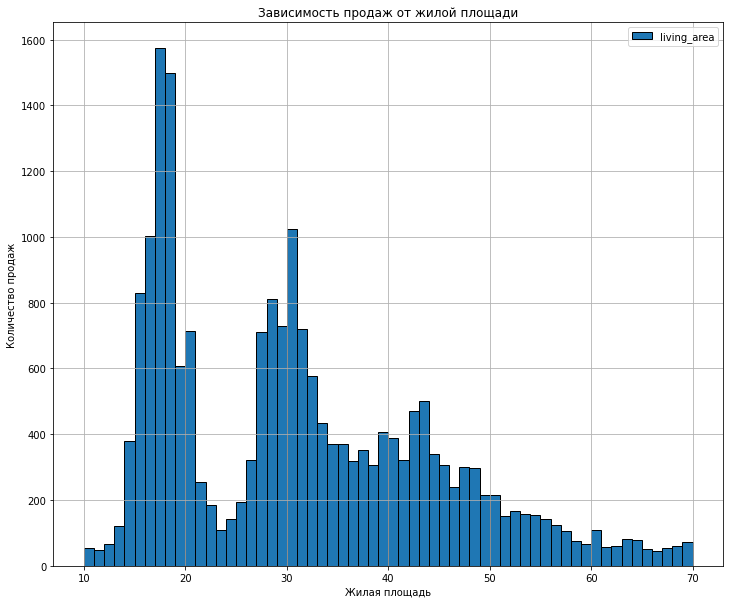

In [ ]:
# Оставим значения от  10 до 70 квадратных метров, отбросив выбросы и построим гистограмму
df['living_area'].hist( bins=60, range=(10, 70), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество продаж')
plt.show()

*Большинство проданных квартир имеют жилую площадь от 15 до 35кв.м. Однако прослеживается резкий спад квартир с жилой площадью от 22кв.м. до 28кв.м. Квартиры  с жилой площадью менее 14кв.м. и более 60кв.м. встречаются редко. Среднее значение(34кв.м.) выше медианного(30кв.м.), из-за этого график сильно растягивается.*

##### Площадь кухни

In [ ]:
# Охарактеризуем столбец kitchen_area
df['kitchen_area'].describe()

count   21,315.0
mean        10.6
std          5.9
min          1.3
25%          7.0
50%          9.1
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64

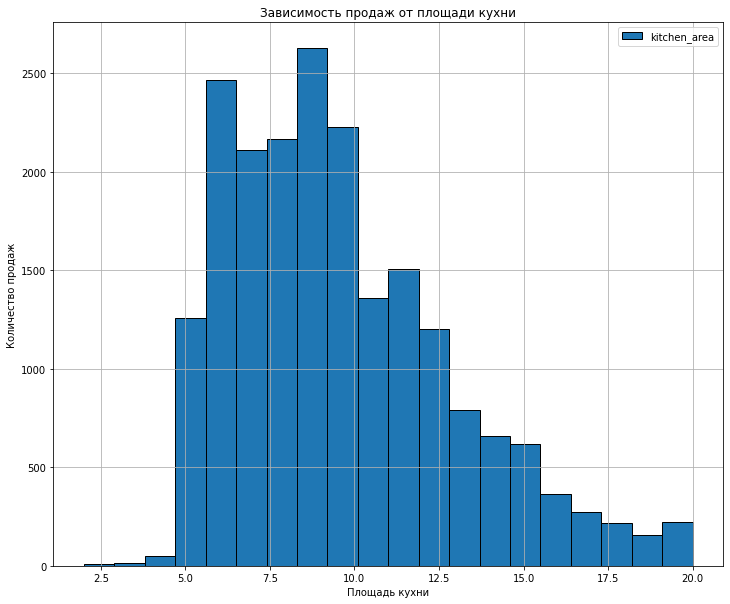

In [ ]:
# Оставим значения от  2 до 20 квадратных метров, отбросив выбросы и построим гистограмму
df['kitchen_area'].hist( bins=20, range=(2, 20), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество продаж')
plt.show()

*Большинство проданных квартир имеют площадь кухни от 5 до 13кв.м. Квартиры  с площадью кухни менее 5кв.м. и более 16кв.м. встречаются редко. Среднее значение(10кв.м.) почти равно медианному(9кв.м.). График слегка растянут в большую сторону.*

##### Цена объекта

In [ ]:
# Охарактеризуем столбец last_price
df['last_price'].describe()

count        23,535.0
mean      6,539,967.8
std      10,917,638.0
min          12,190.0
25%       3,400,000.0
50%       4,632,000.0
75%       6,777,500.0
max     763,000,000.0
Name: last_price, dtype: float64

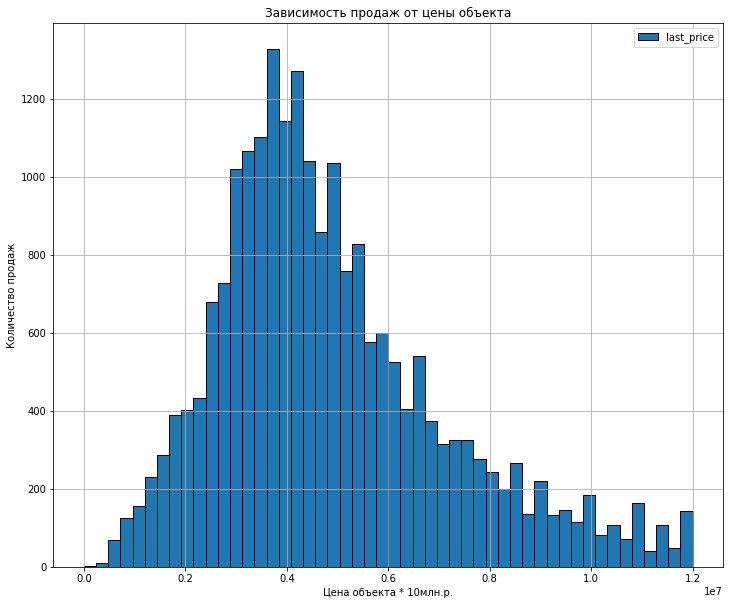

In [ ]:
# Оставим значения от  0 до 12 миллионов рублей, отбросив выбросы и построим гистограмму
df['last_price'].hist( bins=50, range=(0, 12000000), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от цены объекта')
plt.xlabel('Цена объекта * 10млн.р.')
plt.ylabel('Количество продаж')
plt.show()

*Большинство проданных квартир были проданы по цене от 2.5 до 6.5млн.р. Квартиры дешевле 2млн.р. и дороже 9млн.р. встречаются реже. Однако квартиры дороже 10млн.р. имеют всплески на более круглых суммах(10, 11, 12млн.р.) Среднее значение(6.5млн.р.) выше  медианного(4.6млн.р), из-за этого график сильно растягивается.*

##### Количество комнат

In [ ]:
# Охарактеризуем столбец rooms
df['rooms'].describe()

count   23,535.0
mean         2.1
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

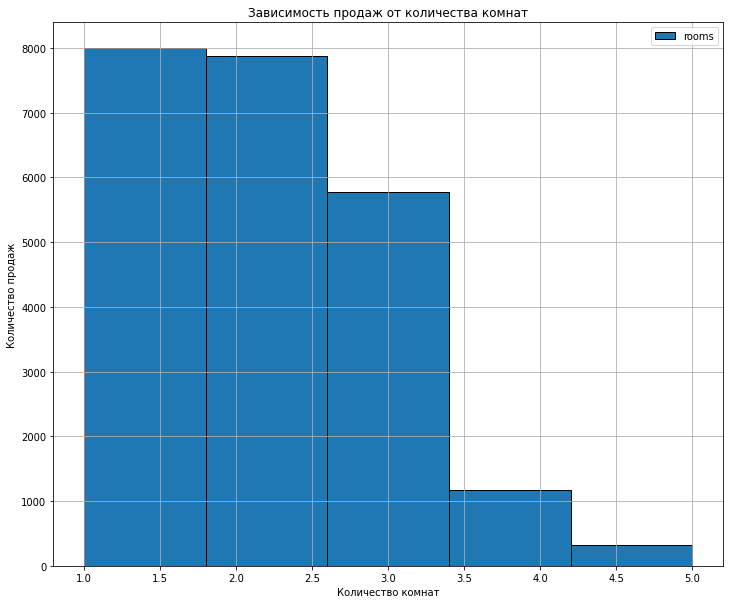

In [ ]:
# Оставим значения от  1 до 5, отбросив выбросы и построим гистограмму
df['rooms'].hist( bins=5, range=(1, 5), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество продаж')
plt.show()

*Большинство проданных квартир имеют от 1 до 2 комнат, реже 3 комнаты. Квартиры с 4 более комнатами всречаются редко. Среднее значение(2) равно  медианному(2). График имеет слабый хвост в большую сторону.*

##### Высота потолков

In [ ]:
# Охарактеризуем столбец ceiling_height
df['ceiling_height'].describe()

count   23,535.0
mean         2.7
std          0.3
min          1.0
25%          2.6
50%          2.6
75%          2.7
max         14.0
Name: ceiling_height, dtype: float64

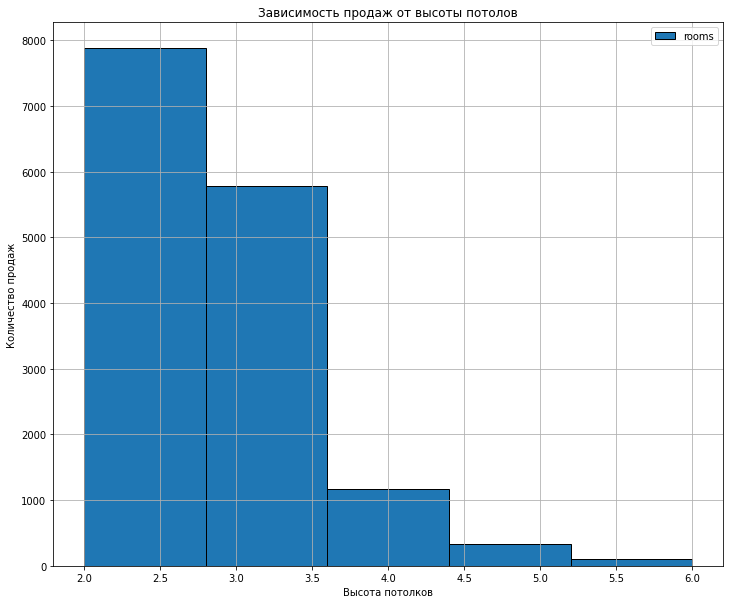

In [ ]:
# Оставим значения от  2 до 6, отбросив выбросы и построим гистограмму
df['rooms'].hist( bins=5, range=(2, 6), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от высоты потолов')
plt.xlabel('Высота потолков')
plt.ylabel('Количество продаж')
plt.show()

*Большинство проданных квартир имеют высоту потолков около 3м. Квартиры с высотой потолков около 4м. и более всречаются редко. Среднее значение(2.7м.) равно  медианному(2,6м.). График имеет слабый хвост в большую сторону.*

##### Тип этажа квартиры

In [ ]:
# Охарактеризуем столбец floor_category
df['floor_category'].describe()

count      23535
unique         3
top       другой
freq       17296
Name: floor_category, dtype: object

In [ ]:
# Так же оценим количество квартир в каждой категории
df['floor_category'].value_counts()

другой       17296
последний     3330
первый        2909
Name: floor_category, dtype: int64

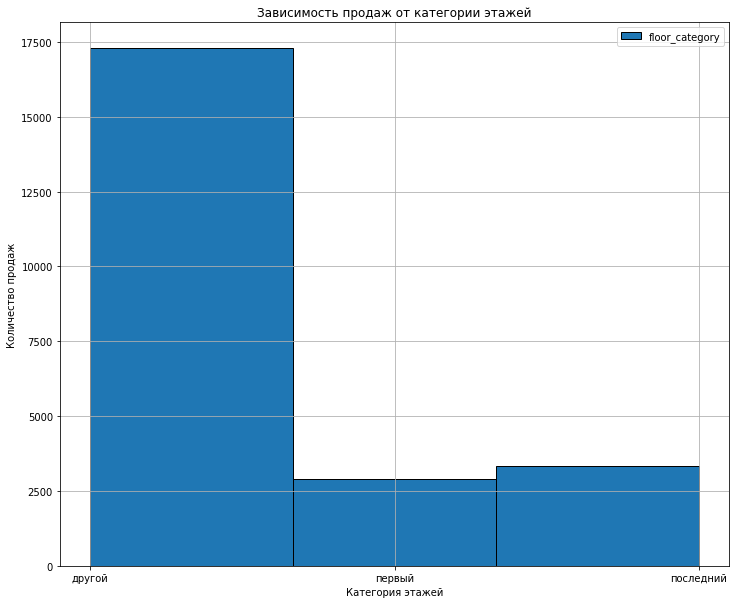

In [ ]:
# Оставим значения от 0 до 2 и построим гистограмму
df['floor_category'].hist( bins=3, range=(0, 2), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от категории этажей')
plt.xlabel('Категория этажей')
plt.ylabel('Количество продаж')
plt.show()

*Большинство проданных квартир расположены от первого до последнего этажа. Квартиры на первом и последнем этаже имеют примерно равное количество и таких квартир относительно мало.*

##### Общее количество этажей

In [ ]:
# Охарактеризуем столбец floors_total
df['floors_total'].describe()

count   23,535.0
mean        10.6
std          6.5
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         34.0
Name: floors_total, dtype: float64

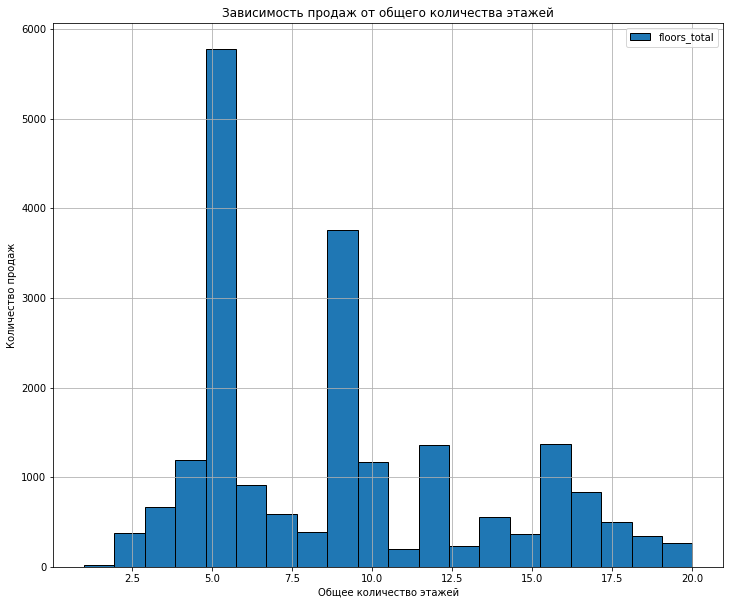

In [ ]:
# Оставим значения от  1 до 20, отбросив выбросы и построим гистограмму
df['floors_total'].hist( bins=20, range=(1, 20), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от общего количества этажей')
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество продаж')
plt.show()

*Большинство домов имеют 5 и 9 этажей. Другие типы домов встречаются реже. Среднее значение(10) примерно равно  медианному(9). График имеет слабый хвост в большую сторону.*

##### Расстояние до центра города в метрах

In [ ]:
# Охарактеризуем столбец city_centers_nearest
df['city_centers_nearest'].describe()

count   18,034.0
mean    14,181.1
std      8,613.0
min        181.0
25%      9,234.0
50%     13,087.0
75%     16,268.0
max     65,968.0
Name: city_centers_nearest, dtype: float64

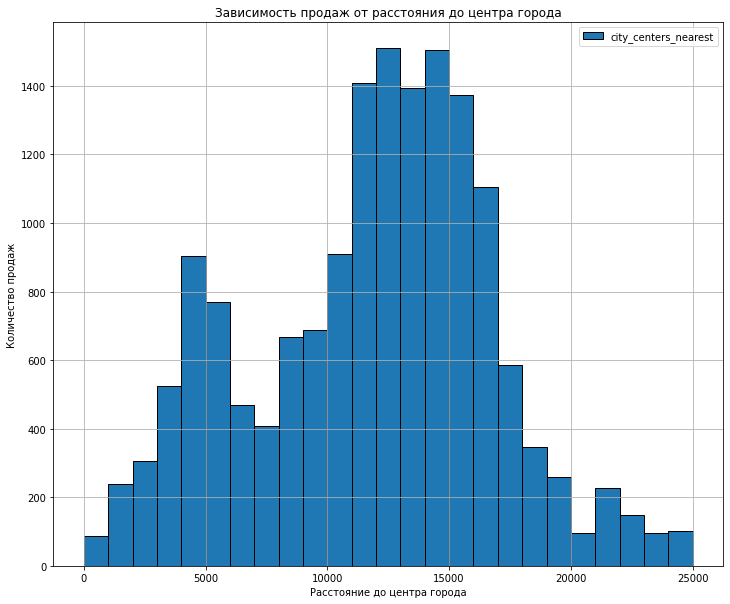

In [ ]:
# Оставим значения от  0 до 25000, отбросив выбросы и построим гистограмму
df['city_centers_nearest'].hist( bins=25, range=(0, 25000), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от расстояния до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество продаж')
plt.show()

*Большинство квартир расположены на расстоянии от центра от 11000 до 16000 метров. Однако есть всплеск и на расстоянии от 5000 до 6000 метров. На другом расстоянии от центра города квартиры встречаются реже. Среднее значение(14100 метров) примерно равно медианному(13000 метров). График почти не имеет слабого хвоста в большую сторону.*

##### Расстояние до ближайшего парка

In [ ]:
# Охарактеризуем столбец parks_nearest
df['parks_nearest'].describe()

count   8,026.0
mean      490.5
std       341.6
min         1.0
25%       288.0
50%       455.0
75%       612.0
max     3,190.0
Name: parks_nearest, dtype: float64

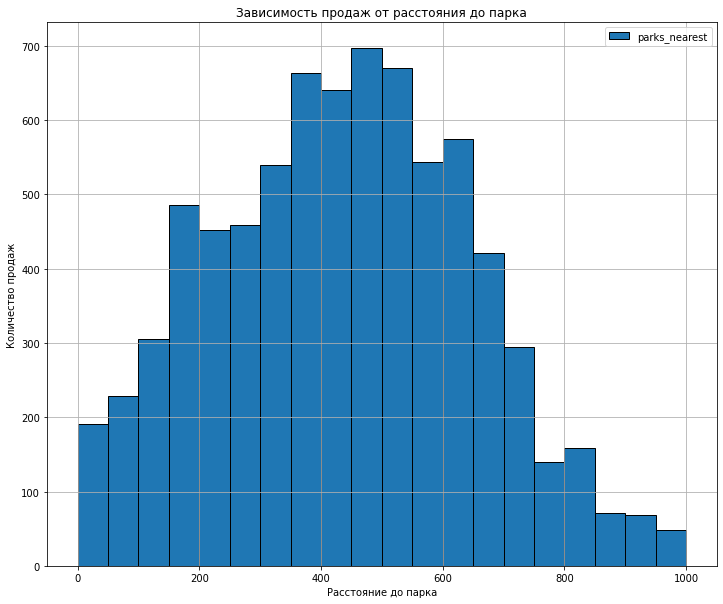

In [ ]:
# Оставим значения от  0 до 1000, отбросив выбросы и построим гистограмму
df['parks_nearest'].hist( bins=20, range=(0, 1000), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от расстояния до парка')
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество продаж')
plt.show()

*Большинство квартир расположены на расстоянии до ближайшего парка от 150 до 700 метров. Однако обращая внимание на огромное количество пропусков стоит учесть, что большинство квартир скорее всего находятся слишком далеко от парков(3000 метров и более). На другом расстоянии до ближайшего парка квартиры встречаются реже. Среднее значение(490 метров) примерно равно  медианному(440 метров). График почти не имеет слабого хвоста в большую сторону.*

##### Вывод:
Большинство проданных квартир имеют:
- Общую площадь от 30 до 70 квадратных метров;
- Жилую площадь от 15 до 35 квадратных метров;
- Площадь кухни от 5 до 13 квадратных метров;
- Высоту потолков около 3 метров(минимум 2.5 и максимум 4,9);
- От 1 до 2 комнат;
- Расположены на этажах от второго до предпоследнего;
- Общее количество этажей - 5 и 9 (максимум 29);
- Цены от 2.5 до 6.5 млн.р. (минимум 1.22млн.р. и максимум 763млн.р.);
- Расстояние до центра от 11 до 16км.;
- Расстояние до парка от 150 до 700 метров, либо дальше 3км.

#### Изучение времени продажи квартиры

In [ ]:
# Охарактеризуем столбец days_exposition
df['days_exposition'].describe()

count   20,371.0
mean       180.8
std        219.8
min          1.0
25%         45.0
50%         95.0
75%        231.0
max      1,580.0
Name: days_exposition, dtype: float64

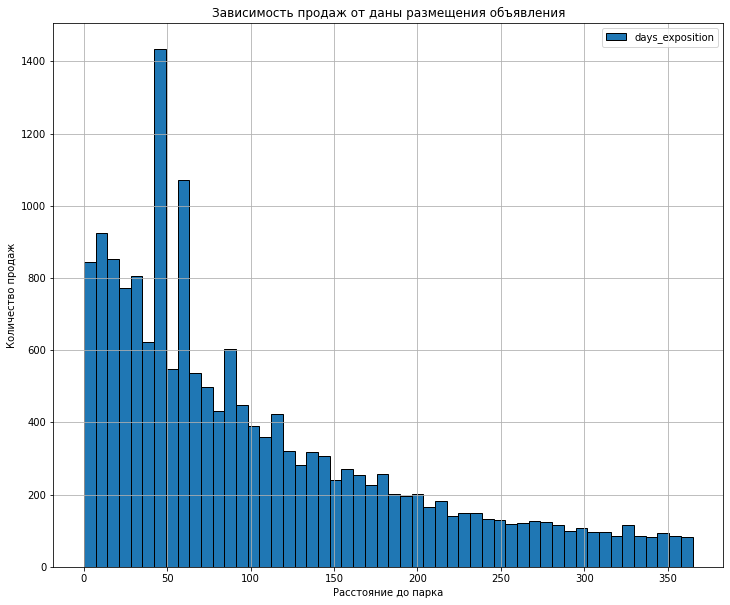

In [ ]:
# Оставим значения с продажами в течение одного года(от 0 до 365 дней), отбросив выбросы,
# разделим значения на недели(52 недели) и построим гистограмму
df['days_exposition'].hist( bins=52, range=(0, 365), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от даны размещения объявления')
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество продаж')
plt.show()

*Большинство продаж были завершены в течение 120 дней(4 месяца), но хвост в большую сторону слишком большой, чтобы делать результативные выводы.*

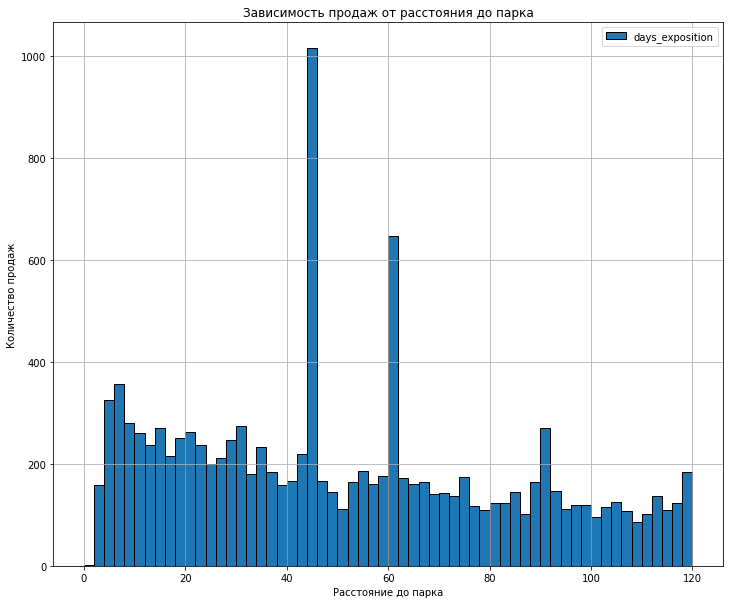

In [ ]:
# Оставим значения с продажами в течение 4 месяцев(от 0 до 120 дней), отбросив выбросы,
# разделим значения на каждые 2 дня(60 корзин) и построим гистограмму
df['days_exposition'].hist( bins=60, range=(0, 120), figsize=(12, 10), ec='black', legend=True)
plt.title('Зависимость продаж от расстояния до парка')
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество продаж')
plt.show()

**Вывод:**
*Большинство продаж были завершены за 45 и 60 дней. Но стоит учесть, что большинство пиков продаж происходит каждые 15 дней. Возможно, в сервисе работает алгоритм на автоматическое закрытие объявлений каждые 15 дней, если пользователь не продлевает объявление. Скорее всего многие пользователи не удаляют объявление после продажи. Быстрыми продажами можно назвать те, которые были завершены в первые 45 дней. Необычно долгими продажами можно назвать продажи, которые продолжались больше 120 дней.*

#### Изучение факторов, влияющих на стоимость квартиры

Изучим, зависит ли цена(**last_price**) от:
- общей площади(**total_area**);
- жилой площади(**living_area**);
- площади кухни(**kitchen_area**);
- количества комнат(**rooms**);
- даты размещения (**publication_weekday, publication_month, publication_year**).

Зависимость от этажа, на котором расположена квартира по категориям(**floor_category**) проверим отдельно.

##### Корреляция зависимости

In [ ]:
# Создадим список с факторами для корреляции
cor_p = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'publication_weekday',
    'publication_month',
    'publication_year']

In [ ]:
# Выведем сводную таблицу корреляции
cor_p_t = df[cor_p].corr()
display(cor_p_t)

,last_price,total_area,living_area,kitchen_area,rooms,publication_weekday,publication_month,publication_year
last_price,1.0,0.7,0.6,0.5,0.4,0.0,0.0,-0.0
total_area,0.7,1.0,0.9,0.6,0.8,-0.0,0.0,-0.1
living_area,0.6,0.9,1.0,0.4,0.8,-0.0,-0.0,-0.1
kitchen_area,0.5,0.6,0.4,1.0,0.3,-0.0,0.0,-0.1
rooms,0.4,0.8,0.8,0.3,1.0,-0.0,-0.0,-0.1
publication_weekday,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0
publication_month,0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.3
publication_year,-0.0,-0.1,-0.1,-0.1,-0.1,-0.0,-0.3,1.0


*Корреляция показывает явную прямую зависимость между ценой и площадями квартиры(общей, жилой и площадью кухни). Менее выраженная прямая зависимость видна между ценой и количеством комнат.*

*Подкорректируем данные, высчитав квантили (Q1, Q2) и размах между ними (IQR).*

In [ ]:
# Определим фукцию, рассчитывающую Q1, Q3 и IQR
def quartil(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

In [ ]:
# Вызовем функцию в цикле
for col in cor_p:
    df[col] = quartil(df, col)

In [ ]:
# Выведем обновлённую сводную таблицу корреляции
cor_p_t = df[cor_p].corr()
display(cor_p_t)

,last_price,total_area,living_area,kitchen_area,rooms,publication_weekday,publication_month,publication_year
last_price,1.0,0.7,0.6,0.5,0.4,-0.0,0.0,0.0
total_area,0.7,1.0,0.9,0.5,0.8,-0.0,0.0,-0.0
living_area,0.6,0.9,1.0,0.2,0.9,-0.0,-0.0,-0.0
kitchen_area,0.5,0.5,0.2,1.0,0.1,-0.0,0.0,-0.0
rooms,0.4,0.8,0.9,0.1,1.0,-0.0,-0.0,-0.0
publication_weekday,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0
publication_month,0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.3
publication_year,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.3,1.0


*После обработки данных показания не изменились.*

**Вывод:**
Значения коррекляции стали более явные.
- Есть сильна зависимость цены(**last_price**):
    - от общей площади(**total_area**);
    - от количества комнат(**rooms**);
- Есть слабая зависимость:
    - от площади кухни(**kitchen_area**);
    - от жилой площади(**living_area**);
- От остальных факторов зависимости практически нет.

*Проверим зависимости графиками:*

##### Зависимость от общей площади

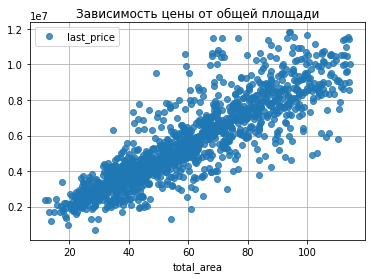

In [ ]:
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.8)
)
plt.title('Зависимость цены от общей площади')
plt.show()

*Заметна прямая зависимость между ценой и площадью квартиры. Так же видно выбросы в ценах на квартиры с площадью более 50кв.м.*

##### Зависимость от жилой площади

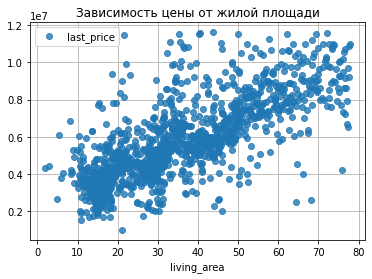

In [ ]:
(
    df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.8)
)
plt.title('Зависимость цены от жилой площади')
plt.show()

*Прямая зависимость между ценой и жилой площадью квартиры менее заметна. Так же видно выбросы в ценах на квартиры по всей площади графика.*

##### Зависимость от площади кухни

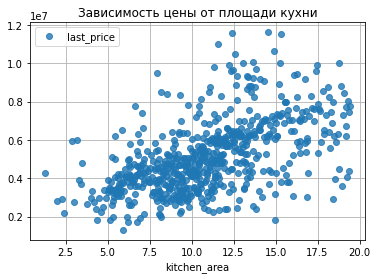

In [ ]:
(
    df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.8)
)
plt.title('Зависимость цены от площади кухни')
plt.show()

*Прямая зависимость практически отсутствует. Множественные выбросы с ценами на квартиры с площадью кухни более 7кв.м.*

##### Зависимость от количества комнат

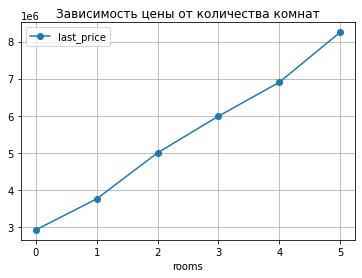

In [ ]:
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость цены от количества комнат')
plt.show()

*Заметна почти идеальная прямая зависимость между ценой и количеством комнат.*

##### Зависимость от дня недели размещения объявления

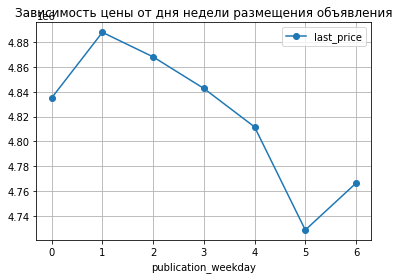

In [ ]:
(
    df.pivot_table(index='publication_weekday', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость цены от дня недели размещения объявления')
plt.show()

*Отслеживается слабая обратная зависимость между ценой и днём недели размещения объявления. В рабочие дни недели объявления выкладывают чаще, чем в выходные*

##### Зависимость от месяца размещения объявления

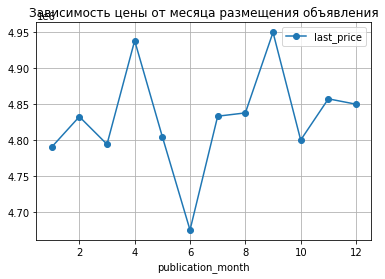

In [ ]:
(
    df.pivot_table(index='publication_month', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость цены от месяца размещения объявления')
plt.show()

*Зависимость между ценой и месяцем размещения объявления не линейная. Чаще всего продаются квартиры в апреле и сентябре. Так же заметен резкий спад продаж в июне.*

##### Зависимость от года размещения объявления

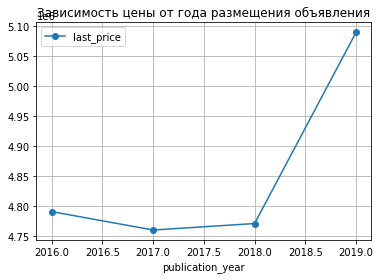

In [ ]:
(
    df.pivot_table(index='publication_year', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость цены от года размещения объявления')
plt.show()

*Зависимость между ценой и годом размещения объявления не линейная. В последние годы квартиры продавались гораздо чаще.*

##### Зависимость от этажа

,mean,count,median
floor_category,,,
другой,"5,026,882.5",15700,"4,589,500.0"
первый,"4,125,910.3",2798,"3,800,000.0"
последний,"4,481,128.3",2988,"4,000,000.0"


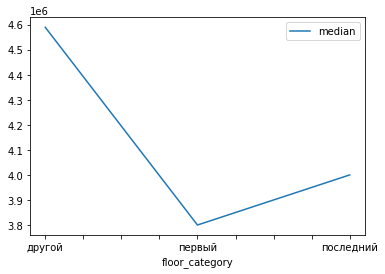

In [ ]:
# Создаем сводную таблицу зависимости
pivot_table_floor_category = df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия столбцам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
# Выведем график зависимости
pivot_table_floor_category.plot(y = 'median', legend=True)
pivot_table_floor_category

*Зависимость между ценой и этажом не линейная.*

##### Вывод:
На стоимость квартиры больше всего влияет общая площадь и этаж квартиры. Чем больше площадь, тем выше цена. Между временем продажи квартиры и ценой линейной зависимости нет. На первых и последних этажах цена ниже, чем на остальных этажах.

#### Средняя цена одного квадратного метра

In [ ]:
# Создадим список  10 городов, где было больше всего продано квартир
top_10_cities = df['locality_name'].value_counts().head(10)

In [ ]:
# Посмотрим на созданный список
top_10_cities

Санкт-Петербург    15622
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [ ]:
# Посчитаем среднюю стоимость одного квадратного метра в выбраных городах
top_10_cities = df.query('locality_name in @top_10_cities.index').pivot_table(index='locality_name', values='price_per_square_meter')

In [ ]:
# Выведем готовый список
top_10_cities.sort_values(by ='price_per_square_meter', ascending=False)

,price_per_square_meter
locality_name,
Санкт-Петербург,"114,873.0"
Пушкин,"103,125.8"
Кудрово,"95,260.8"
Парголово,"90,175.9"
Мурино,"86,041.1"
Шушары,"78,551.3"
Колпино,"75,424.6"
Гатчина,"68,746.1"
Всеволожск,"68,654.5"


**Вывод:**
- Список 10 городов, где больше всего продано квартир:
    - **Санкт-Петербург**
    - **Пушкин**
    - **Кудрово**
    - **Парголово**
    - **Мурино**
    - **Шушары**
    - **Колпино**
    - **Гатчина**
    - **Всеволожск**
    - **Выборг**
- Самые высокие цены за 1 кв.м. в городе **Санкт-Петербург**.
- Самые низкие цены за 1 кв.м. в городе **Выборг**.

#### Квартиры в Санкт-Петербурге

*Изучим цены квартир в зависимости от расстояния до центра города*

In [ ]:
# Создадим датафрейм с данными о квартирах Санкт-Петербурга
df_spb = df.query('locality_name == "Санкт-Петербург"')

In [ ]:
# Охарактеризуем данные по столбцу distance_city_center
df_spb['distance_city_center'].describe()

count   15,562.0
mean        11.6
std          4.8
min          0.0
25%          8.0
50%         12.0
75%         15.0
max         29.0
Name: distance_city_center, dtype: float64

In [ ]:
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,publication_weekday,publication_month,publication_year,floor_category,distance_city_center
0,20,NaN,108.0,2019-03-07,3.0,2.7,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,"120,370.4",3,3,"2,019.0",другой,16.0
2,10,"5,196,000.0",56.0,2015-08-20,2.0,2.6,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,"92,785.7",3,8,NaN,другой,14.0
3,0,NaN,NaN,2015-07-24,3.0,2.6,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,"408,176.1",4,7,NaN,другой,7.0
4,2,"10,000,000.0",100.0,2018-06-19,2.0,3.0,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,"100,000.0",1,6,"2,018.0",другой,8.0
7,5,"7,915,000.0",71.6,2019-04-18,2.0,2.6,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,"110,544.7",3,4,"2,019.0",другой,12.0


In [ ]:
# Создадим сводную таблицу с медианными ценами на первых 15км от центра города
df_spb = df_spb.query('distance_city_center < 15').pivot_table(index='distance_city_center', values='last_price', aggfunc = 'median')

In [ ]:
# Выведем таблицу
df_spb

,last_price
distance_city_center,
0.0,"7,600,000.0"
1.0,"8,400,000.0"
2.0,"8,200,000.0"
3.0,"7,300,000.0"
4.0,"7,500,000.0"
5.0,"7,500,000.0"
6.0,"6,800,000.0"
7.0,"6,300,000.0"
8.0,"6,282,000.0"


In [ ]:
# Проверим корреляцию
df_spb['last_price'].corr(df['distance_city_center'])

-0.5490695117738484

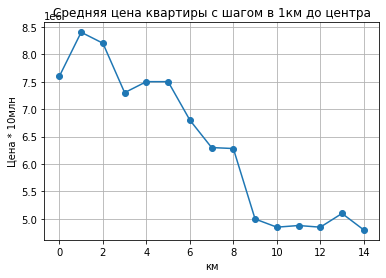

In [ ]:
# построим график по сводной таблице
df_spb.plot(grid=True, style='o-',legend=False)
plt.title('Средняя цена квартиры с шагом в 1км до центра')
plt.xlabel('км')
plt.ylabel('Цена * 10млн')
plt.show()

**Вывод:**
- Имеется обратная зависимость цены от расстояния до центра примерно до 9км, потом цены становятся более линейными;
- Максимальная стоимость квартир находится около центра;
- Пики вниз на 0км и 3км скорее всего связаны с выбросами в виде особенности жилья.

### Общий вывод

Во время проведения исследований была проделана следующая работа:
- Прочитаны и изучены полученные данные;
- Выполнена предобработка данных:
    - обработаны пропуски в данных:
      - **ceiling_height** - **Заменены пропуски на медианные значения**;
      - **floors_total** - **Пропуски удалены**;
      - **is_apartment** - **Пропуски заменены на значение на False**;
      - **balcony** - **Пропуски заменены на 0**;
      - **locality_name** - **Пропуски удалены**.
    - обработаны типы данных:
      - **last_price** (float64 - int64);
      - **first_day_exposition** (object - datetime);
      - **floors_total** (float64 - int64);
      - **is_apartment** (object - bool);
      - **balcony** (float64 - int64)
    - .обработаны дубликаты:
      - Явные дубликаты не обнаружены;
      - Не явные дубликаты обнаружены в столбце **locality_name** - убрали типы населённого пункта, оставив только названия.
- Добавлены новые столбцы:
    - **price_per_square_meter** - цена одного квадратного метра;
    - **publication_weekday** - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - **publication_month** - месяц публикации объявления;
    - **publication_year** - год публикации объявления;
    - **floor_category** - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    - **distance_city_center** - расстояние до центра города в километрах.
- Исследованы данные.  



На основе исследований сделаны следующие выводы:

**На стоимость квартир влиют следующие факторы(в порядке убывания):**
- Площадь квартиры(прямая зависимость);
- Количество комнат(прямая зависимость);
- Жилая площадь(прямая зависимость);
- Площадь кухни(прямая зависимость);
- Расстояние до центра города(обратная зависимость).

**На основе изученных данных можно выделить самые продаваемые квартиры по следующим параметрам:**
- 1 или 2 комнаты;
- 5 и 9 этажные дома;
- Общая площадь до 70кв.м.;
- Цена до 6,5млн.р.;
- Расстояние до центра города от 11 до 16км.


**Быстрыми продажами** квартиры можно считать те, которые совершились в течение **от 45 до 120 дней**.\
**Самые дорогими квартирами** можно считать квартиры, продаваемые в **Санкт-Петербурге(114873 рубля за 1 квадратный метр)**

### **Чек-лист готовности проекта**

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.